# ** Pan Card Tampering Detection**#

Thje purpose of this project is to detect tampering of pan card using computer vision. This Project will help different organization in detection whether the ID i.e the PAN card provided to them by their employers or customers.



We will calculate structural similarity og original PAN Card and Pan Card uploaded by user.

In [ ]:
#import the packages
from skimage.metrics import structural_similarity  #help in structural  similiarity of PAN Cards
import imutils          #basic image processing functions
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image


In [ ]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream = True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream = True).raw)

####Loading orginal and User provided Images

In [ ]:
#the file format of the source file
print("Orginal Image format : ", original.format)
print("Tampered Image format : ", tampered.format)

#Image size in pixel
print("Orhinal Image size : ", original.size)
print("Tempered Image size : ", tampered.size)

Orginal Image format :  JPEG
Tampered Image format :  PNG
Orhinal Image size :  (1200, 800)
Tempered Image size :  (282, 179)


####Converting the format of tampered image similiar to original image

In [ ]:
#resize image
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.png')
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


#### Converting the size of tampered and original image.


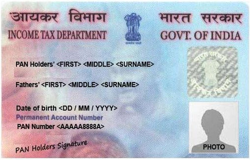

In [ ]:
original

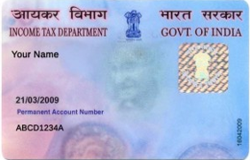

In [ ]:
tampered

#### User provided image which will be compared with PAN card.


In [ ]:
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

#### Reading image using OPENCV



In [ ]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

#### Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.  


In [ ]:
#compute the structural similarity Index (ssim) b/w the two image
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


#### Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.


In [ ]:
# Calculating threshold and contours (an outline especially of a curving or irregular figure)
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
#### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [ ]:
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

#### Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.


Original Format Image


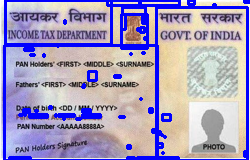

In [ ]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


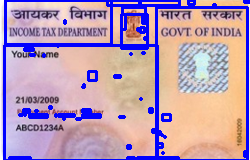

In [ ]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


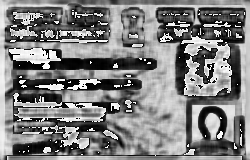

In [ ]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


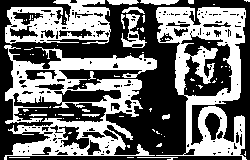

In [ ]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)


# Summary
#### Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.
#### As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.
#### Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.  